In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('base_tratada.csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              999 non-null    int64  
 1   gender                           999 non-null    object 
 2   income                           999 non-null    int64  
 3   spending_score                   999 non-null    float64
 4   membership_years                 999 non-null    float64
 5   purchase_frequency               999 non-null    float64
 6   preferred_category               999 non-null    object 
 7   last_purchase_amount             999 non-null    float64
 8   income_qcut                      999 non-null    object 
 9   income_level                     999 non-null    int64  
 10  spending_qcut                    999 non-null    object 
 11  spending_score_level             999 non-null    int64  
 12  purchase_frequency_qcu

In [7]:
pal = {
    'bronze': '#FF4136',
    'prata': '#B10DC9',
    'ouro': '#2ECC40'
}

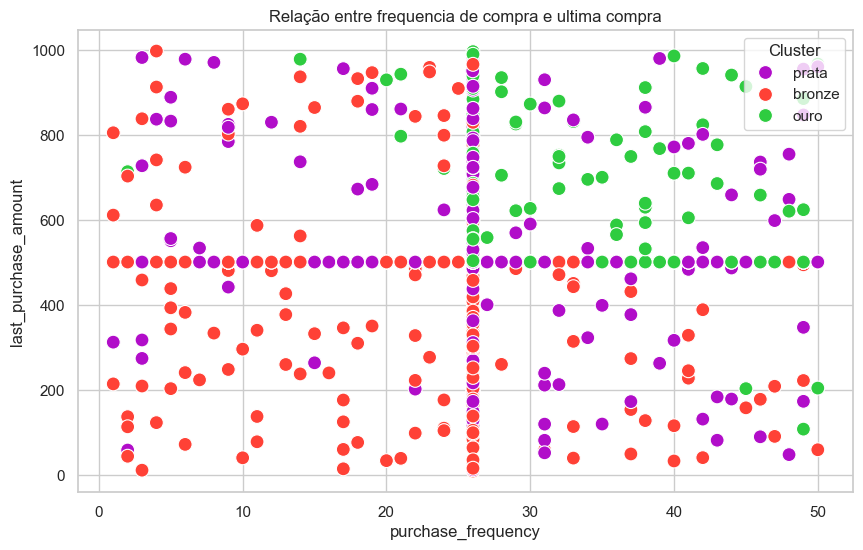

In [20]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.scatterplot(data=df, x='purchase_frequency', y='last_purchase_amount', hue='score_final_qcut_level', palette=pal, s=100)

# Definir rótulos e título
plt.xlabel("purchase_frequency")
plt.ylabel("last_purchase_amount")
plt.title("Relação entre frequencia de compra e ultima compra")

# Exibir o gráfico com legenda
plt.legend(title="Cluster")
plt.show()

Clientes "ouro" em geral possuem maior frequencia de compra a ultima compra foi de maior valor.

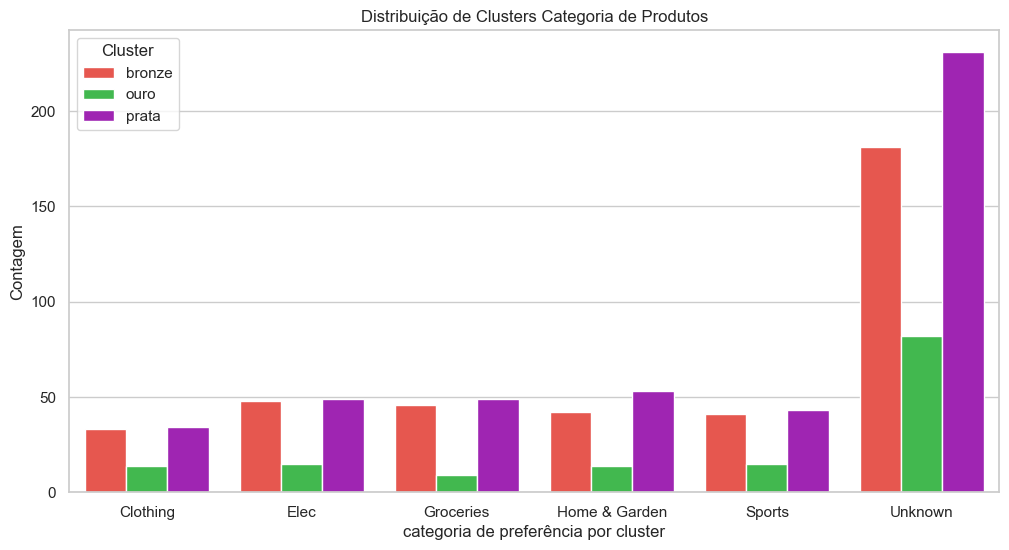

In [21]:

sns.set(style="whitegrid")

cluster_counts = df.groupby(['preferred_category', 'score_final_qcut_level']).size().unstack(fill_value=0)


cluster_counts_melted = cluster_counts.reset_index().melt(id_vars=['preferred_category'], var_name='score_final_qcut_level', value_name='Contagem')

plt.figure(figsize=(12, 6))
sns.barplot(data=cluster_counts_melted, x='preferred_category', y='Contagem', hue='score_final_qcut_level', palette=pal)

plt.xlabel("categoria de preferência por cluster")
plt.ylabel("Contagem")
plt.title("Distribuição de Clusters Categoria de Produtos")


plt.legend(title="Cluster")
plt.show()

De acordo com a distribuição, em geral clientes ouro compram menos produtos que os demais, porém o valor da compra é mais alto. Clientes prata são os com maior volume em quantidade de compras.

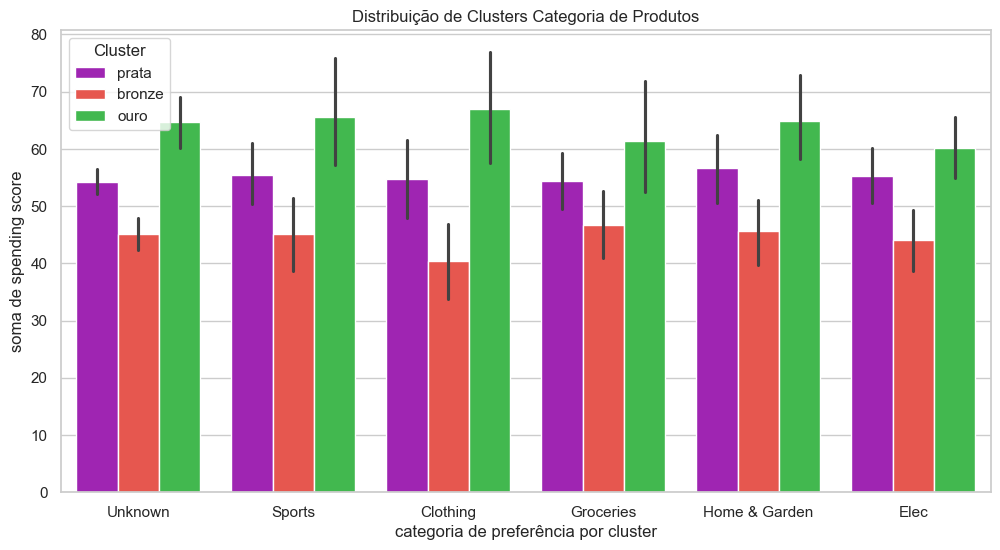

In [31]:

sns.set(style="whitegrid")

cluster_counts = df.groupby(['preferred_category', 'score_final_qcut_level']).size().unstack(fill_value=0)


cluster_counts_melted = cluster_counts.reset_index().melt(id_vars=['preferred_category'], var_name='score_final_qcut_level', value_name='Contagem')

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='preferred_category', y='spending_score', hue='score_final_qcut_level', palette=pal)

plt.xlabel("categoria de preferência por cluster")
plt.ylabel("soma de spending score")
plt.title("Distribuição de Clusters Categoria de Produtos")


plt.legend(title="Cluster")
plt.show()

De modo geral, clientes ouro são os que possuem mais pontuação de gastos.

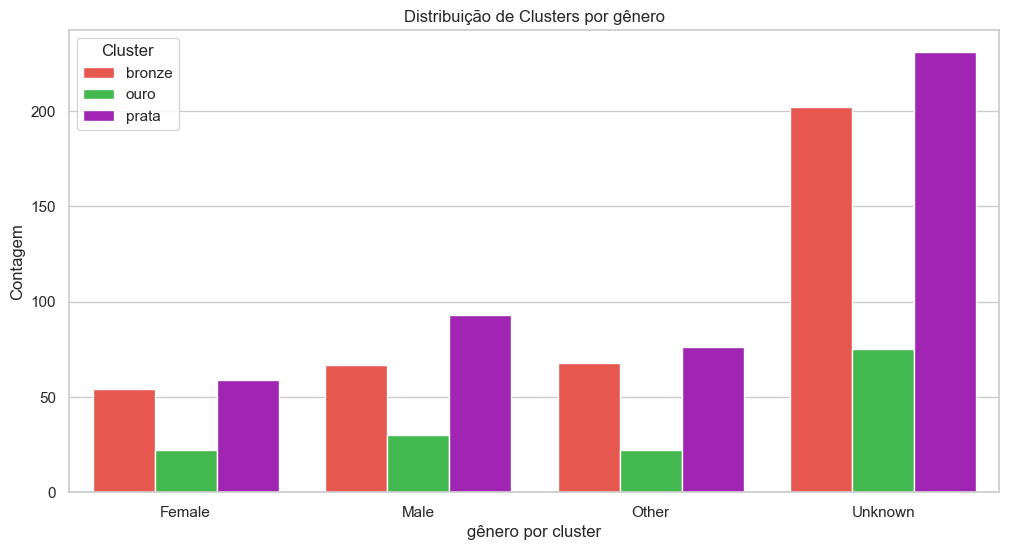

In [24]:
sns.set(style="whitegrid")

cluster_counts = df.groupby(['gender', 'score_final_qcut_level']).size().unstack(fill_value=0)


cluster_counts_melted = cluster_counts.reset_index().melt(id_vars=['gender'], var_name='score_final_qcut_level', value_name='Contagem')

plt.figure(figsize=(12, 6))
sns.barplot(data=cluster_counts_melted, x='gender', y='Contagem', hue='score_final_qcut_level', palette=pal)

plt.xlabel("gênero por cluster")
plt.ylabel("Contagem")
plt.title("Distribuição de Clusters por gênero")


plt.legend(title="Cluster")
plt.show()

Clientes ouro são mais frequentes no gênero masculino. Mas de modo geral, entre os masculinos e femininos, o maior número são os clientes prata

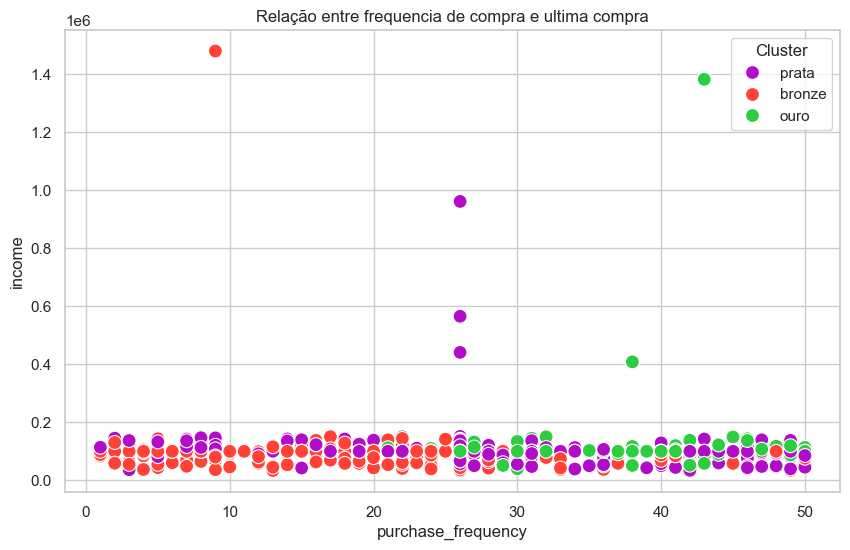

In [25]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.scatterplot(data=df, x='purchase_frequency', y='income', hue='score_final_qcut_level', palette=pal, s=100)

# Definir rótulos e título
plt.xlabel("purchase_frequency")
plt.ylabel("income")
plt.title("Relação entre frequencia de compra e ultima compra")

# Exibir o gráfico com legenda
plt.legend(title="Cluster")
plt.show()

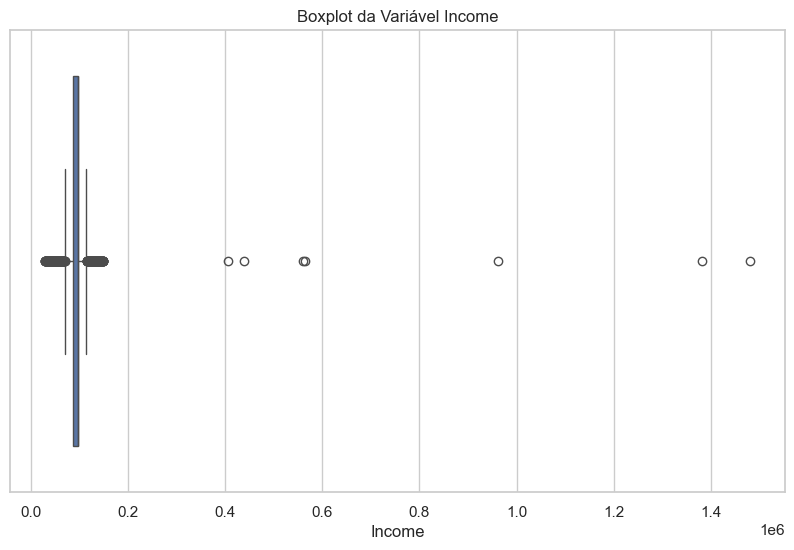

In [26]:
# Configurar o tamanho do gráfico
plt.figure(figsize=(10, 6))

# Criar um boxplot para a variável 'income'
sns.boxplot(x=df['income'])

# Adicionar título e rótulos aos eixos
plt.title('Boxplot da Variável Income')
plt.xlabel('Income')

# Mostrar o gráfico
plt.show()

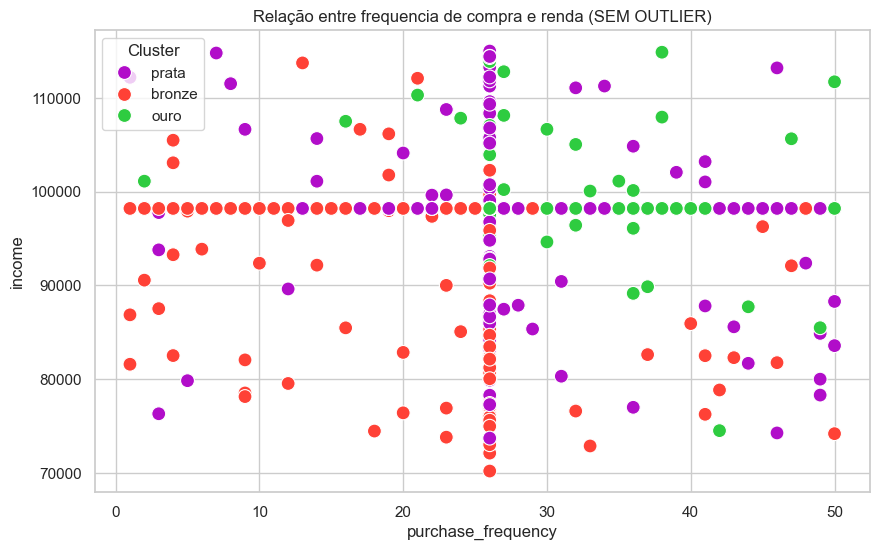

In [28]:
Q1 = df['income'].quantile(0.25)
Q3 = df['income'].quantile(0.75)

# Calcular o IQR (Interquartile Range)
IQR = Q3 - Q1

# Determinar os limites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar os dados para excluir temporariamente os outliers
df_sem_outliers = df[(df['income'] >= limite_inferior) & (df['income'] <= limite_superior)]


plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.scatterplot(data=df[(df['income'] >= limite_inferior) & (df['income'] <= limite_superior)], x='purchase_frequency', y='income', hue='score_final_qcut_level', palette=pal, s=100)

# Definir rótulos e título
plt.xlabel("purchase_frequency")
plt.ylabel("income")
plt.title("Relação entre frequencia de compra e renda (SEM OUTLIER)")

# Exibir o gráfico com legenda
plt.legend(title="Cluster")
plt.show()

Há uma relação de classificação positiva entre renda e frequencia de compra. Quanto maior a renda e a frequencia de compra, maior chance do cliente ser Ouro. Quanto menor, maior a chance de ser bronze.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              999 non-null    int64  
 1   gender                           999 non-null    object 
 2   income                           999 non-null    int64  
 3   spending_score                   999 non-null    float64
 4   membership_years                 999 non-null    float64
 5   purchase_frequency               999 non-null    float64
 6   preferred_category               999 non-null    object 
 7   last_purchase_amount             999 non-null    float64
 8   income_qcut                      999 non-null    object 
 9   income_level                     999 non-null    int64  
 10  spending_qcut                    999 non-null    object 
 11  spending_score_level             999 non-null    int64  
 12  purchase_frequency_qcu

In [5]:
df_member_cluster = pd.DataFrame(df.groupby('score_final_qcut_level')['membership_years'].mean())
df_purchase_amount_cluster = pd.DataFrame(df.groupby('score_final_qcut_level')['last_purchase_amount'].mean())
df_purchase_frequency_cluster = pd.DataFrame(df.groupby('score_final_qcut_level')['purchase_frequency'].mean())
df_income_cluster =pd.DataFrame(df.groupby('score_final_qcut_level')['income'].mean())
df_spending_score_cluster = pd.DataFrame(df.groupby('score_final_qcut_level')['spending_score'].mean())


In [45]:
df_purchase_frequency_cluster.head()

,purchase_frequency
score_final_qcut_level,
bronze,22.113699
ouro,32.684759
prata,27.185037


C:\Users\julio\AppData\Local\Temp\ipykernel_17160\1266696523.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Cluster")


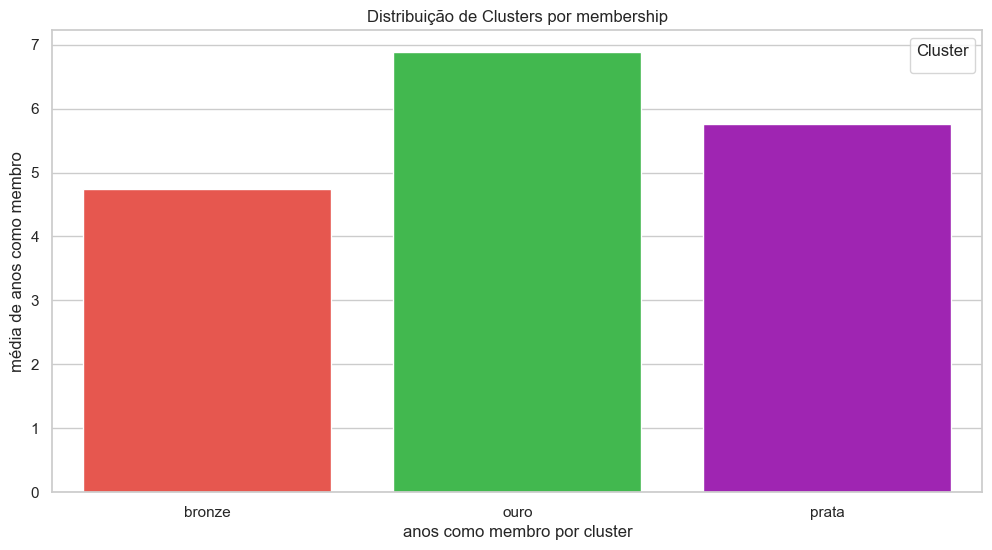

In [42]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(data=df_member_cluster, x='score_final_qcut_level', y='membership_years', hue='score_final_qcut_level', palette=pal)

plt.xlabel("anos como membro por cluster")
plt.ylabel("média de anos como membro")
plt.title("Distribuição de Clusters por membership")


plt.legend(title="Cluster")
plt.show()

Os clientes Ouro possuem a maior média de tempo de membros em ano. A média dos clientes Ouro é 7. A média dos clientes prata é 5. E a média dos clientes bronze é 4.

C:\Users\julio\AppData\Local\Temp\ipykernel_13612\3518923190.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Cluster")


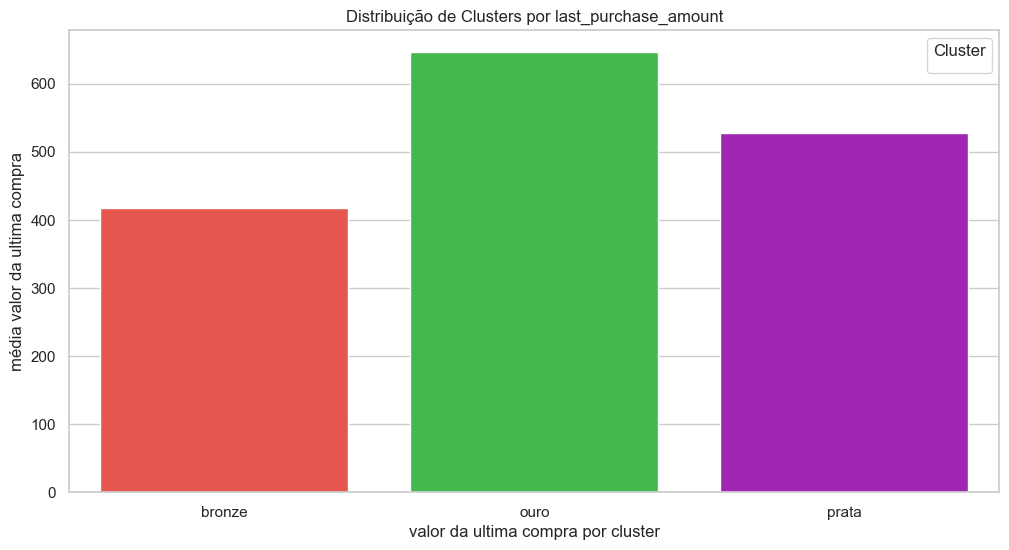

In [8]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(data=df_purchase_amount_cluster, x='score_final_qcut_level', y='last_purchase_amount', hue='score_final_qcut_level', palette=pal)

plt.xlabel("valor da ultima compra por cluster")
plt.ylabel("média valor da ultima compra")
plt.title("Distribuição de Clusters por last_purchase_amount")


plt.legend(title="Cluster")
plt.show()

A média de valores da ultima compra para ouro é acima de 600, para prata é acima de 500, e para bronze é pouco mais de 400.

C:\Users\julio\AppData\Local\Temp\ipykernel_17160\2763424542.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Cluster")


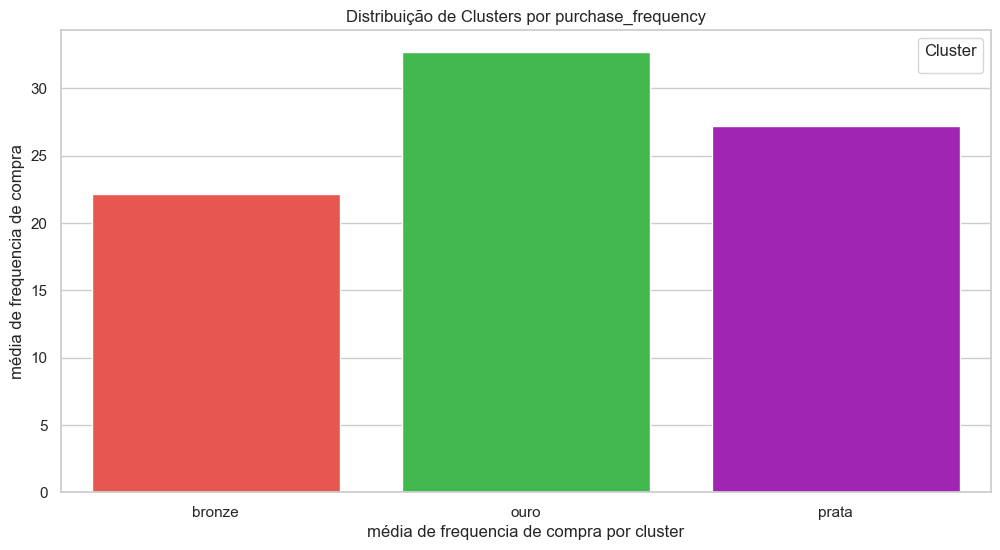

In [47]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(data=df_purchase_frequency_cluster, x='score_final_qcut_level', y='purchase_frequency', hue='score_final_qcut_level', palette=pal)

plt.xlabel("média de frequencia de compra por cluster")
plt.ylabel("média de frequencia de compra")
plt.title("Distribuição de Clusters por purchase_frequency")


plt.legend(title="Cluster")
plt.show()

a média de frequencia de compra para ouro é acima de 30, para prata é acima de 25 e bronze acima de 20.

C:\Users\julio\AppData\Local\Temp\ipykernel_17160\3444073095.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Cluster")


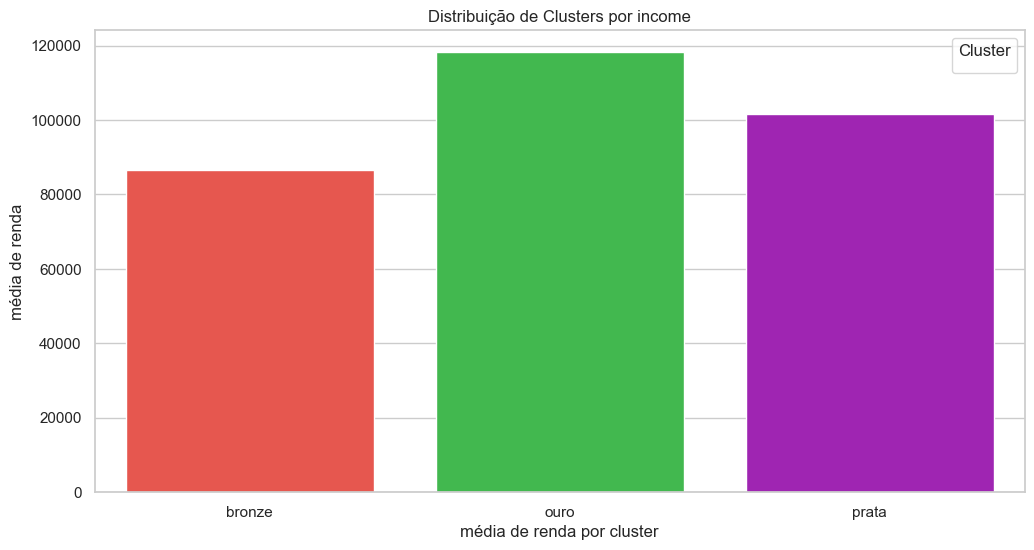

In [49]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(data=df_income_cluster, x='score_final_qcut_level', y='income', hue='score_final_qcut_level', palette=pal)

plt.xlabel("média de renda por cluster")
plt.ylabel("média de renda")
plt.title("Distribuição de Clusters por income")


plt.legend(title="Cluster")
plt.show()

A média de renda para ouro é perto dos 120000, prata 100.000 e bronze pouco mais de 80.000

C:\Users\julio\AppData\Local\Temp\ipykernel_17160\2480625341.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Cluster")


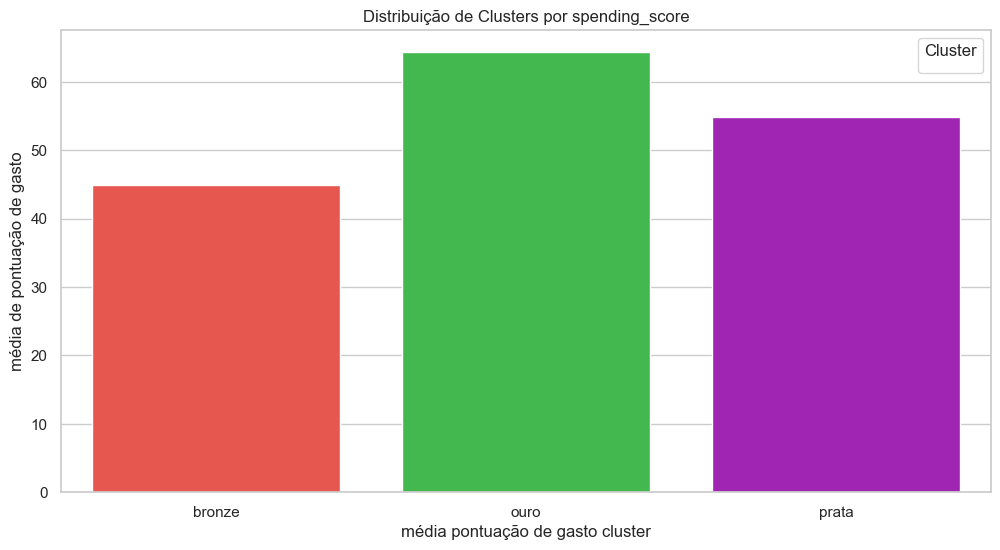

In [50]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(data=df_spending_score_cluster, x='score_final_qcut_level', y='spending_score', hue='score_final_qcut_level', palette=pal)

plt.xlabel("média pontuação de gasto cluster")
plt.ylabel("média de pontuação de gasto")
plt.title("Distribuição de Clusters por spending_score")


plt.legend(title="Cluster")
plt.show()

A pontuação de gasto para ouro é acima de 60, prata é acima de 50 e bronze acima de 40